The data consist of today's return, today's close, and today's volume.

In [1]:
import numpy as np
X = np.load('zipped_zrxbtc.npy')
Vols = X[:-3,-1].copy()

X

array([[ 0.00000000e+00,  1.33000000e-04,  4.17817400e-01],
       [ 4.51127820e-04,  1.33060000e-04,  4.68242800e-02],
       [ 1.20246505e-03,  1.33220000e-04,  3.49794660e-01],
       ...,
       [ 0.00000000e+00,  1.68830000e-04,  3.53360250e-01],
       [-3.55387076e-04,  1.68770000e-04,  7.77722300e-02],
       [ 1.12579250e-03,  1.68960000e-04,  4.74414910e-01]])

In [2]:
X[:,-1] = X[:,-1]/1000.0
X[:,-1]=np.log(X[:,-1]+1e-6)/1000
X

array([[ 0.        ,  0.000133  , -0.00777808],
       [ 0.00045113,  0.00013306, -0.00994798],
       [ 0.00120247,  0.00013322, -0.00795531],
       ...,
       [ 0.        ,  0.00016883, -0.0079452 ],
       [-0.00035539,  0.00016877, -0.00944895],
       [ 0.00112579,  0.00016896, -0.00765132]])

In [3]:
np.std(X[:,-1]),np.std(X[:,0])

(0.0017708445253081853, 0.002555378294901362)

Features include past 5 days return sequence, past 5 days price range, and past 5 days sum volume(log scaled).

In [4]:
XX=[]
w = 5
for i in range(int(len(X)/w)):
    #x = list(X[i*w:w*i+w,0])
    x=[sum(X[i*w:i*w+w,0])*1.0]
    x+=[(max(X[i*w:i*w+w,1])-min(X[i*w:i*w+w,1]))]
    x+=[sum(X[i*w:i*w+w,-1])*1.0]
    XX.append(x)
XX

[[0.0005274327818345342, 2.199999999999945e-07, -0.04662115585063417],
 [-0.002703449026685069, 5.399999999999914e-07, -0.0394627844954379],
 [-0.002322319060872694, 8.300000000000039e-07, -0.04297351127755464],
 [-0.0015735136013427563, 7.00000000000017e-07, -0.04466210580445347],
 [0.008314568106788028, 1.299999999999869e-07, -0.045534036092282244],
 [-0.003600669225512874, 6.29999999999999e-07, -0.03881238390891471],
 [0.0026357908101954626, 4.6000000000000576e-07, -0.05231842120940104],
 [-0.00784597586467176, 1.6299999999999963e-06, -0.0467439490899509],
 [0.0008475980871861196, 5.70000000000003e-07, -0.05473708868151079],
 [0.0034763964305299867, 4.6000000000000576e-07, -0.054018748738873926],
 [-0.0033840741700179497, 6.599999999999835e-07, -0.04867736556066633],
 [0.002660835953830768, 4.700000000000006e-07, -0.04863930035625123],
 [0.0021894350193875697, 3.899999999999878e-07, -0.05948198399057749],
 [-0.004211107690899895, 1.799999999999881e-07, -0.04925273541726773],
 [0.000

In [5]:
Mins = np.load('Mins_zrxbtc.npy')
Mins = Mins[:-3]

In [6]:
Close = np.load('close_zrxbtc.npy')
Close=Close[:-3]

In [89]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from hmmlearn import hmm
warnings.filterwarnings('ignore')
np.random.seed(10)
model = hmm.GaussianHMM(n_components=10, covariance_type="full", min_covar=0.0,verbose=True,n_iter=100)
model.fit(XX)  
model.monitor_  

         1      200430.1454             +nan
         2      128579.6104      -71850.5350


ConvergenceMonitor(history=[200430.1453944514, 128579.61044411211], iter=2,
          n_iter=100, tol=0.01, verbose=True)

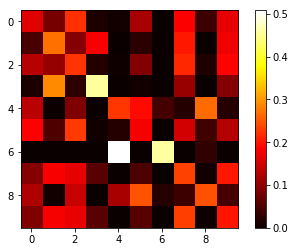

In [90]:
from matplotlib import pyplot as plt
from matplotlib.colors import PowerNorm

%matplotlib inline
plt.imshow(model.transmat_, cmap='hot', interpolation='nearest')
plt.colorbar()

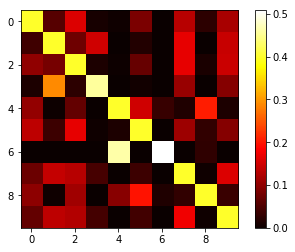

In [91]:

for s in range(model.n_components):
    p = max(0.4,np.max(model.transmat_[s]))
    if model.transmat_[s][s]>=p:
        pass
    else:
        denom = sum(model.transmat_[s])-model.transmat_[s][s]
        model.transmat_[s]/=denom
        model.transmat_[s]*=1-p
        model.transmat_[s][s] = p
plt.imshow(model.transmat_, cmap='hot', interpolation='nearest')
plt.colorbar()

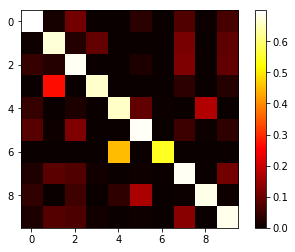

In [92]:
for s in range(model.n_components):
    model.transmat_[s] = model.transmat_[s]**2
    model.transmat_[s]/=sum(model.transmat_[s])
plt.imshow(model.transmat_, cmap='hot', interpolation='nearest')
plt.colorbar()

In [93]:
ZZ = model.predict(XX)

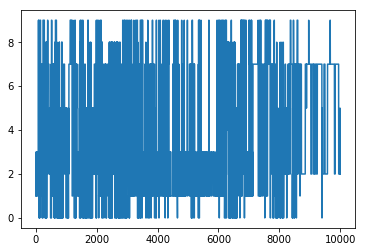

In [94]:
plt.plot(ZZ)

In [95]:
len(XX),len(ZZ)

(9999, 9999)

In [96]:
len(Mins),len(Close)

(49995, 49995)

In [97]:
Z=[]
for i in ZZ:
    Z+=[i]*w
print len(Z)
Z = np.array(Z)

49995


In [98]:

print("Transition matrix")
print(model.transmat_)
print()
from matplotlib import cm
print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()



Transition matrix
[[6.99222330e-01 1.53911917e-02 1.10291397e-01 4.68297945e-04
  1.17710679e-04 3.29841928e-02 1.23019382e-06 7.53223311e-02
  3.33282983e-03 6.28684887e-02]
 [6.87524576e-03 6.69231578e-01 2.47293947e-02 9.35878290e-02
  5.32068278e-07 1.61752556e-03 3.18141649e-10 1.16510408e-01
  9.01505295e-06 8.74384714e-02]
 [4.57564304e-02 2.91935835e-02 6.89847579e-01 9.18840846e-04
  5.06284362e-05 2.17325304e-02 9.09182441e-08 1.20373016e-01
  7.09495158e-04 9.14178058e-02]
 [6.81505093e-04 2.68936650e-01 2.31582539e-03 6.62942279e-01
  3.29449909e-08 1.83154310e-04 4.62204798e-14 3.66491458e-02
  1.12418723e-07 2.82912949e-02]
 [4.48991980e-02 1.94929167e-05 1.94979829e-02 2.70166304e-08
  6.59159528e-01 9.26753061e-02 5.12035082e-03 1.17387874e-03
  1.76468638e-01 9.85597885e-04]
 [7.94164776e-02 6.63882233e-03 1.22526939e-01 1.31023814e-04
  1.00173351e-03 6.93380922e-01 8.91245559e-08 5.36669568e-02
  3.87699031e-03 3.93600459e-02]
 [4.54876334e-07 1.12085416e-15 3.455069

In [99]:
Ret = X[:,0]
log_Ret = np.log(Ret+1.0)
def score_plot(Mins,Close,Vols,Ret,Z,n_comp,fee=0.005):
    end = []
    Seg = []
    plt.figure()
    for i in range(n_comp):
        cur = [0]
        seg = 0
        flag= False
        for j in range(len(Z)):
            if i == Z[j]:
                if not flag:
                    seg+=1
                    flag = True
                cur.append(cur[-1]+Ret[j])
            else:
                if flag:
                    flag=False
                cur.append(cur[-1])
        end.append(cur[-1])
        Seg.append(seg)
        plt.plot(Mins,cur[1:],label='Z='+str(i)+' '+str(cur[-1]))
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Cumulative Log Return')
    plt.figure()
    fig, ax1 = plt.subplots(figsize=(20,6))
    color = 'tab:red'
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('eth-btc', color=color)
    ax1.plot(Mins, Close, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('volume', color=color)  # we already handled the x-label with ax1
    ax2.plot(Mins, Vols, color=color)
    ax2.set_ylim(0,1000)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout() 
    score_up = 0
    score_down = 0
    score_none = 0
    tseg = sum(Seg)
    #fee=0.005
    for i in range(n_comp):

        if end[i]<0.2*max(end) and end[i]>0.2*min(end):
            score_none+=end[i]
            ax1.plot(Mins[Z==i],Close[Z==i],'bo',markersize=1)
        elif end[i]>=0.2*max(end):
            score_up+=end[i]-fee*Seg[i]
            ax1.plot(Mins[Z==i],Close[Z==i],'ro',markersize=3)
        else:
            score_down+=abs(end[i])-fee*Seg[i]
            ax1.plot(Mins[Z==i],Close[Z==i],'go',markersize=3)
    score = score_up+score_down-abs(score_none)
    print 'Score:'+str(score)
    return score,Seg

Score:7.723330205067587


(7.723330205067587, [172, 152, 158, 66, 30, 194, 8, 134, 58, 90])

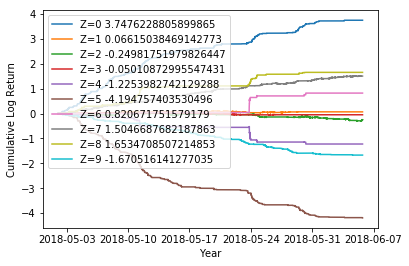

<Figure size 432x288 with 0 Axes>

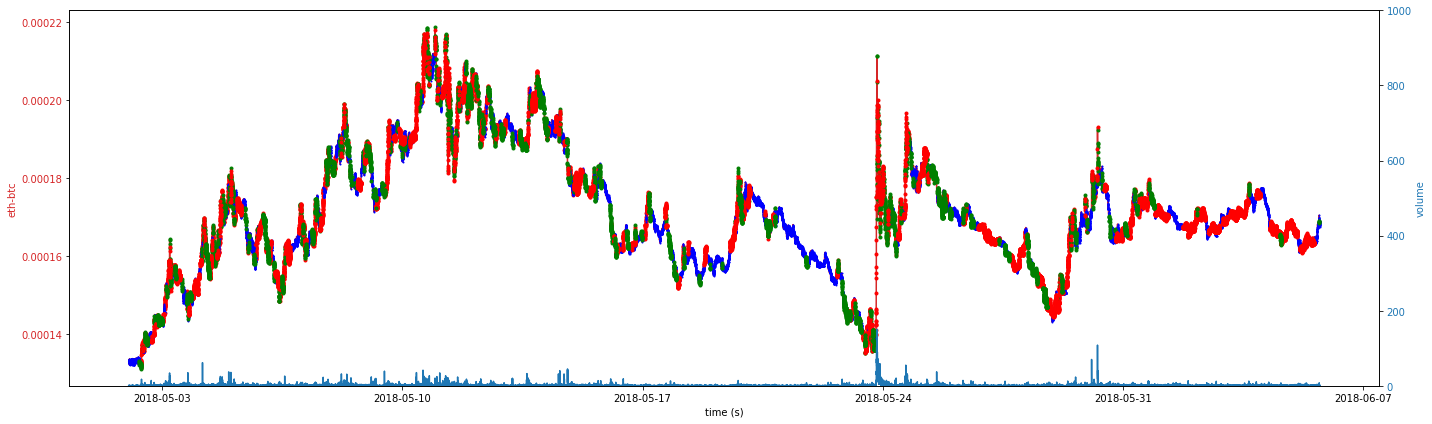

In [100]:
score_plot(Mins,Close,Vols,Ret,Z,model.n_components,fee=0.01)

### Results:
#### p threshold = 0.9:  Score = 5.972
####            = 0.7:  Score = 6.923
####            = 0.5:  Score = 7.617
####            = 0.4:  Score = 7.723
####            = 0.3:  Score = 5.699